In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Dense, Flatten, UpSampling2D

In [2]:
data = np.load(r"D:\Balance\College and Studies\TY\CV & DL Lab\CVDL Dataset\Image classification\mnist_compressed.npz")

X_test, y_test, X_train, y_train =  data['test_images'], data['test_labels'], data['train_images'], data['train_labels']

In [3]:
X_train.shape

(60000, 28, 56)

##### The scale of std dev of the gaussian is one of the hyper param affecting the noise the most
##### Also the noise_factor more big = more noise

In [4]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
noise_factor = 0.6
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [6]:
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 56, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 56, 1))
X_train = np.reshape(X_train, (len(X_train), 28, 56, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 56, 1))

In [7]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

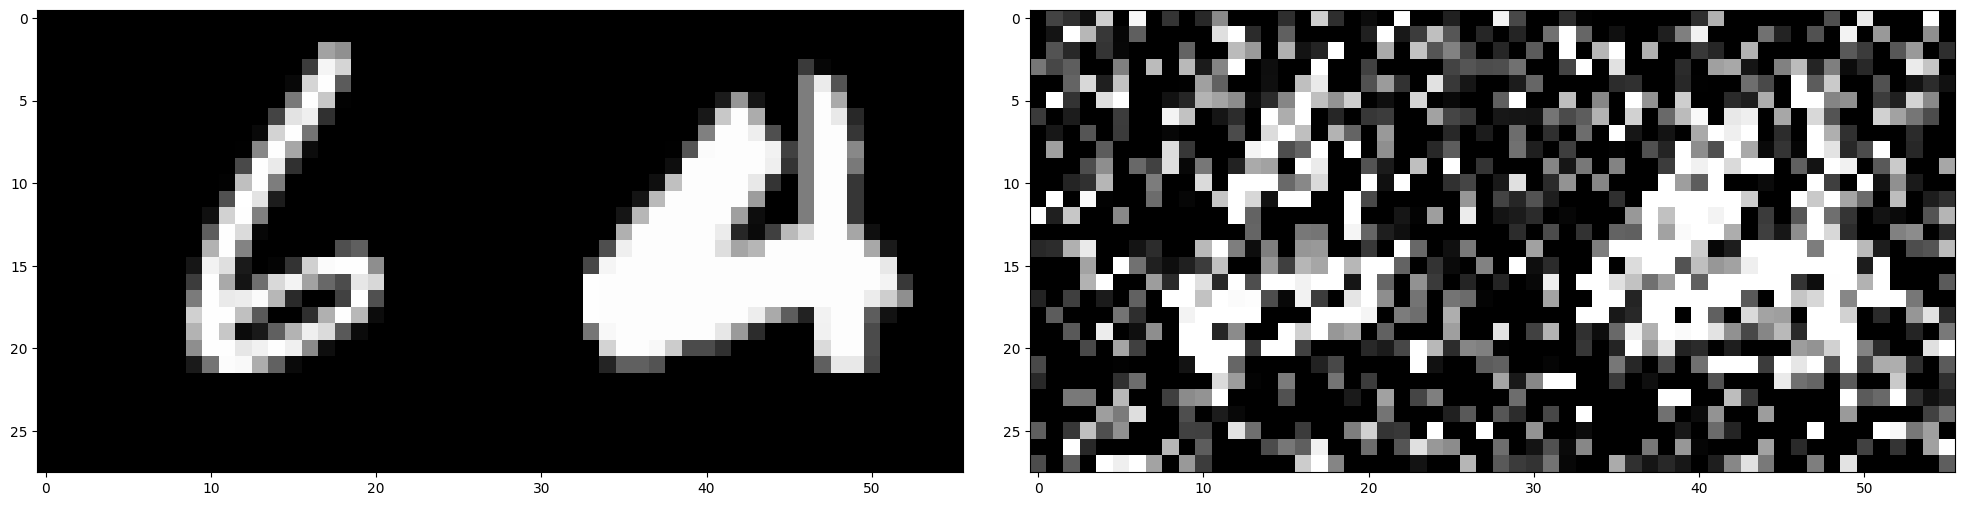

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

plt.gray()
axes[0].imshow(X_train[0, : ,: , :])
axes[1].imshow(x_train_noisy[0, :,: , :])


plt.tight_layout()
plt.show()

In [9]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 56, 1)),
                    MaxPool2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPool2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

D:\Balance\College and Studies\TY\CV & DL Lab\Practice\test_venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 56, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 14, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 14, 16)           │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 28, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 56, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(x_train_noisy, X_train, epochs=10, batch_size=256, validation_data=(x_test_noisy, X_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.7757 - loss: 0.3711 - val_accuracy: 0.8055 - val_loss: 0.1519
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.8057 - loss: 0.1482 - val_accuracy: 0.8067 - val_loss: 0.1367
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.8077 - loss: 0.1360 - val_accuracy: 0.8079 - val_loss: 0.1301
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.8084 - loss: 0.1308 - val_accuracy: 0.8085 - val_loss: 0.1265
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.8096 - loss: 0.1268 - val_accuracy: 0.8098 - val_loss: 0.1240
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.8099 - loss: 0.1246 - val_accuracy: 0.8093 - val_loss: 0.1219
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.8102 - loss: 0.1227 - val_accuracy: 0.8094 - val_loss: 0.1204
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.8102 - loss: 0.1213 -

In [13]:
model.save('./denoise_2.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


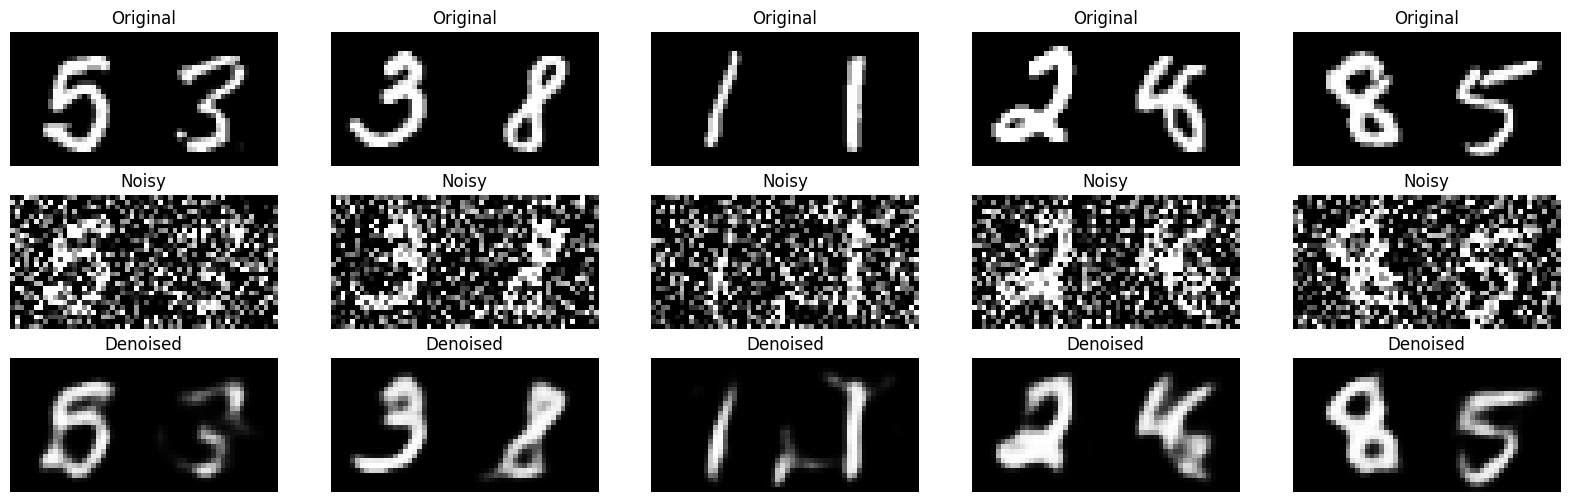

In [14]:
denoised_images = model.predict(x_test_noisy)

# Plot original, noisy, and denoised images
n = 5  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 56), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 56), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_images[i].reshape(28, 56), cmap='gray')
    plt.title("Denoised")
    plt.axis("off")

plt.show()